<a href="https://colab.research.google.com/github/iamkishan98/Fake-news-detection-on-Social-media-using-Deep-learning-/blob/main/fake_news_nlp_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Fakenews/')

In [ ]:


import numpy as np 
import pandas as pd # data processing


from subprocess import check_output
print(check_output(["ls", "gettingreal/"]).decode("utf8"))



fake.csv



In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

all_news = pd.read_csv("gettingreal/fake.csv")
#all_news.head()
all_news

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs


In [ ]:
print("Types and counts of stories", all_news.groupby(["type"]).size())


Types and counts of stories type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
dtype: int64


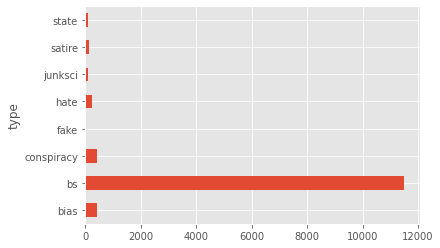

In [ ]:
all_news.groupby(['type']).size().plot(kind='barh')

In [ ]:
fake_news = all_news[all_news["type"] == "fake"]

In [ ]:
import nltk
nltk.download('punkt')
# Fill any blank fields
fake_news.title.fillna("", inplace=True)
fake_news.text.fillna("", inplace=True)

# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')

words = nltk.word_tokenize(" ".join(all_text.tolist()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
fake_news.head(20)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
57,8a35883f9c9f0b15a9e20ab8711d403d91d57405,0,Jimmy Rustling,2016-10-27T13:00:00.000+03:00,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,english,2016-10-27T15:50:22.818+03:00,abcnews.com.co,CO,65078.0,The Amish In America Commit Their Vote To Dona...,0.000,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
58,c6fb8dae30e3d378935e910540a0cb99b5351ac0,0,Jimmy Rustling,2016-11-11T12:00:00.000+02:00,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,english,2016-11-11T16:33:32.484+02:00,abcnews.com.co,US,65078.0,Obama Signs Executive Order Declaring Investig...,0.009,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
379,504e8fa4469d75f8d22984220568e3313c74a1b7,0,"Day of the Dead 2015: History, food and reflec...",2016-10-27T05:18:00.000+03:00,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,"adobochron 10 Comments \nSan Francisco, Califo...",english,2016-10-27T07:25:28.782+03:00,adobochronicles.com,US,NaN,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
380,20e1a45f760f8db5f26207bbfe827bf8cd6d65bb,0,Ivan Jose,2016-10-27T09:18:46.193+03:00,Comment on Tutorial: Riding The Philippine Jee...,"adobochron 1 Comment \nMANILA, Philippines (Th...",english,2016-10-27T09:18:46.193+03:00,adobochronicles.com,US,NaN,Comment on Tutorial: Riding The Philippine Jee...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
381,9874fcff14d4af3c13954116c55590b28a5b98b8,0,Tony Rabon,2016-10-28T19:56:09.149+03:00,Comment on What White House Executive Chef Com...,"adobochron 1 Comment Comerford \nWASHINGTON, D...",english,2016-10-28T19:56:09.149+03:00,adobochronicles.com,US,NaN,Comment on What White House Executive Chef Com...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
382,3b136392b55de72123d5b03a3d07e575119e944d,0,Shirley Barnett,2016-11-02T22:41:00.000+02:00,Comment on Philippines Voids Building Permit O...,adobochron 7 Comments A rendering of the Trump...,english,2016-11-03T21:38:32.268+02:00,adobochronicles.com,US,NaN,Comment on Philippines Voids Building Permit O...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
383,6cc3f4a496a8124a3832867e74a1a26a9ae43232,0,برنامه ریزی ضمیر ناخوداگاه,2016-11-04T22:17:00.000+02:00,Comment on Hillary Clinton Campaign Logo Has A...,"adobochron 1 Comment \nSAN FRANCISCO, Californ...",english,2016-11-05T20:52:38.316+02:00,adobochronicles.com,US,NaN,Comment on Hillary Clinton Campaign Logo Has A...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
384,d6cf2ee2ebc9b55ec8385b0a20f9417cbd9f63a9,0,adobochron,2016-11-06T23:48:58.529+02:00,Comment on Philippine Government To ‘Take Back...,"adobochron 2 Comments \nMANILA, Philippines ( ...",english,2016-11-06T23:48:58.529+02:00,adobochronicles.com,US,NaN,Comment on Philippine Government To ‘Take Back...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
385,a0ec7a8f22b44b92bea5c01a45c70e30b17384b4,0,Rebecca Bennett,2016-11-12T00:27:00.000+02:00,"Comment on If Elected President, Donald Trump ...",adobochron 2 Comments The Trump hotels in Las ...,english,2016-11-12T01:24:50.353+02:00,adobochronicles.com,US,NaN,"Comment on If Elected President, Donald Trump ...",0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
386,c545a56e757eeb80748da7f585752084b8d73c3f,0,Eligio Abellera,2016-11-15T18:56:14.861+02:00,Comment on WHITE HOUSE EXECUTIVE CHEF REVEALS ...,"adobochron 3 Comments Comerford \nWashington, ...",english,2016-11-15T18:56:14.861+02:00,adobochronicles.com,US,NaN,Comment on WHITE HOUSE EXECUTIVE CHEF REVEALS ...,0.000,https://adobochroniclesdotcom.files.wordpre

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string

stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

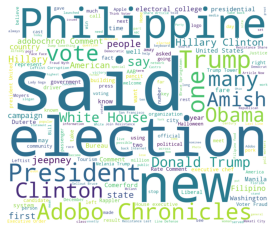

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [16]:

bigrams = nltk.bigrams(cleanwords)

In [17]:
# look at the most common. 

from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(10))

[(('The', 'Adobo'), 20), (('Adobo', 'Chronicles'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 13), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6)]


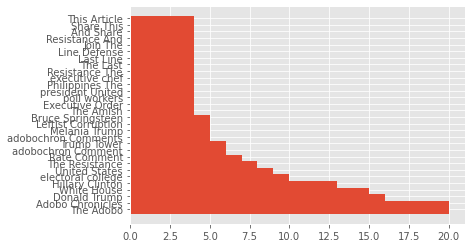

In [18]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)

plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()